# Метод сеток решения одномерного нестационарного уравнения теплопроводности

## Задание 2

### Вывод формул для задачи 2

Рассмотрим уравнение баланса, которое на любом отрезке $[a, b]$, где $0 < a < b < l$, имеет вид:

$$
W(a) - W(b) - \int_a^b q(x)u(x)dx + \int_a^b f(x)dx = 0
$$

$$
W(x) = -k(x)u'(x)
$$

$\int_a^b q(x)u(x)dx$ опустим, так как $q(x) = 0$

Введём:

$$
x_n = nh, n=0,1,2,...,N, Nh = l
$$

А также промежуточные (потоковые) узлы:

$$
x_{n+-0.5} = x_n +- 0.5h
$$

Запишем уравнение баланса на отрезке $[x_{n-0.5}, x_{n+0.5}]$:

$$
W_{n-0.5} - W_{n+0.5} + \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx = 0
$$

Найдём $W_{n-0.5}, W_{n+0.5}$. Для этого проинтегрируем $u'(x)=-\frac{W(x)}{k(x)}$ на отрезке $[x_{n-1}, x_n]$:

$$
u_{n-1} - u_n = \int_{x_{n-1}}^{x_n} \frac{W(x)}{k(x)}dx
$$

Тогда при $x_{n-0.5} \leq x \leq x_{n+0.5}$:

$$
W_{n-0.5} \approx -a_n\frac{y_n-y_{n-1}}{h}
$$

$$
a_n = (\frac{1}{h} \int_{x_{n-1}}^{x_n} \frac{dx}{k(x)})^{-1}
$$
А
$$
W_{n+0.5} \approx -b_n\frac{y_{n+1}-y_{n}}{h}
$$

$$
b_n = (\frac{1}{h} \int_{x_{n}}^{x_{n+1}} \frac{dx}{k(x)})^{-1}
$$

Также обозначим:

$$
\varphi_n = \frac{1}{h} \int_{x_{n-0.5}}^{x_{n+0.5}} f(x)dx
$$

#### Получим систему для решения

$$
\frac{1}{h}(b_n\frac{y_{n+1}-y_{n}}{h} -a_n\frac{y_n-y_{n-1}}{h}) = -\varphi_n
$$

И $y_0 = g_1, y_N = g_2$

#### Итоговая формула

$$
\frac{a_n}{h^2} y_{n-1} - \frac{a_n + b_n}{h^2} + \frac{b_n}{h^2} = -\varphi_n
$$

In [4]:
import math
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

In [104]:
lb, gl = 0, 0
rb, gr = 1, 0
k1, k2, k3 = 80, 1, 20
x0 = lb+(rb-lb) / 3
# x0 = lb+(rb-lb) / 5
x1 = lb + (rb-lb) * 2 / 3
# x1 = rb+5
h = (rb-lb) / 150   
source = [(lb + (rb-lb) / 2, 100)]

In [105]:
def a(x):
    if x <= x0:
        return k1
    elif x-h < x0 < x:
        return h / ((x0-x+h) / k1 + (x-x0) / k2)
    elif x <= x1:
        return k2
    elif x-h < x1 < x:
        return h / ((x0-x+h) / k2 + (x-x0) / k3)
    else:
        return k3
    

def b(x):
    if x + h <= x0:
        return k1
    elif x < x0 < x + h:
        return h / ((x0-x) / k1 + (x+h-x0) / k2)
    elif x+h <= x1:
        return k2
    elif x-h < x1 < x:
        return h / ((x0-x+h) / k2 + (x-x0) / k3)
    else:
        return k3
    
    
def phi(x, x0, c):
    if abs(x - x0) - h / 2 < 1e-5:
        return c / 2
    elif 2*x - h < 2*x0 < 2*x+h:
        return c
    else:
        return 0

def second_task():
    n = int((rb-lb)/h) + 1
    matrix = np.zeros(shape=(n, n))
    terms = np.zeros(n)
    matrix [0, 0], terms[0] = 1, gl
    matrix[-1, -1], terms[-1] = 1, gr
    for i in range(1, n-1):
        xi = lb + i*h
        matrix[i, i-1] = a(xi)
        matrix[i, i] = -b(xi) - a(xi)
        matrix[i, i+1] = b(xi)
        terms[i] = -h * sum(phi(xi, s, c) for s, c in source)
#     print(matrix)
    return np.arange(lb, rb+h, h), np.linalg.solve(matrix, terms)

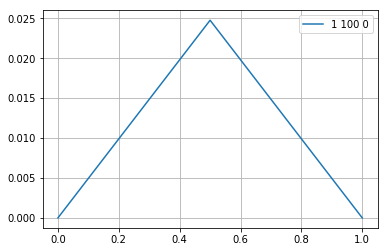

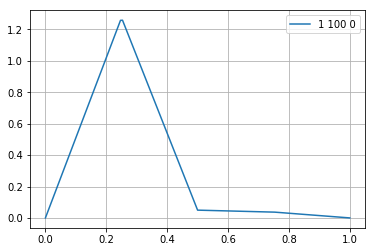

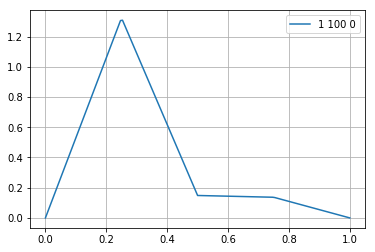

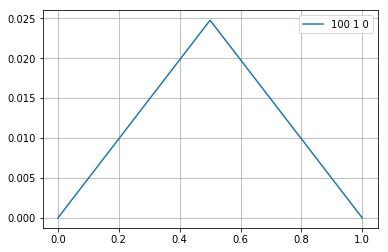

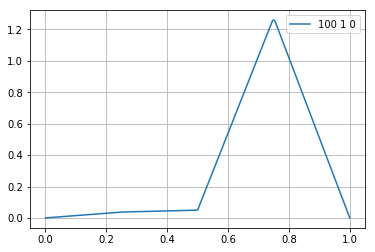

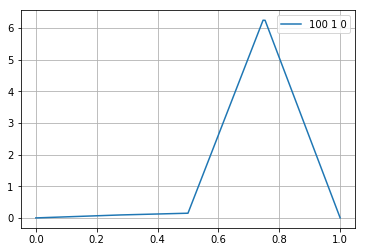

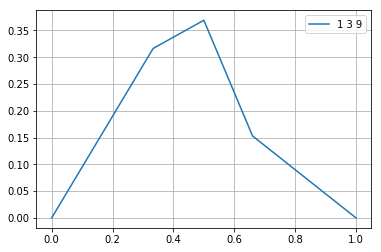

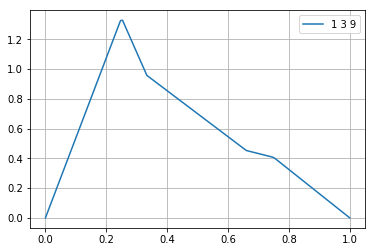

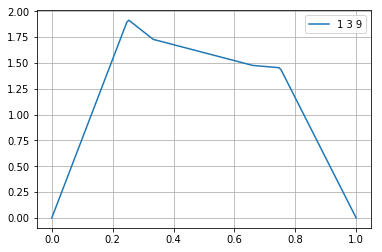

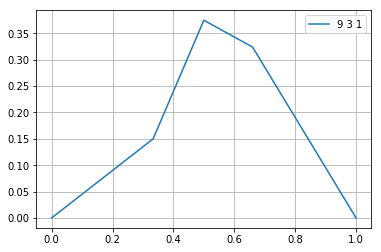

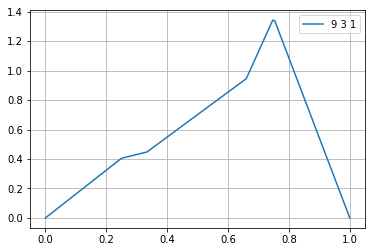

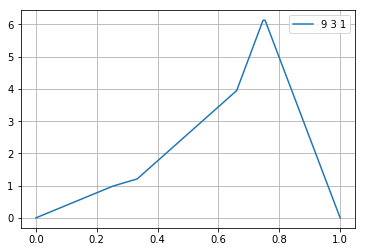

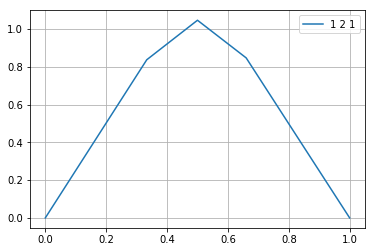

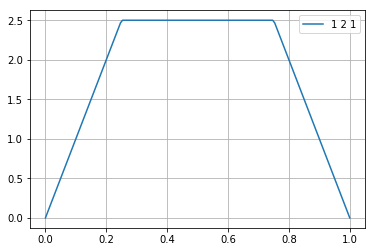

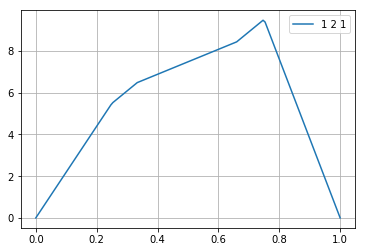

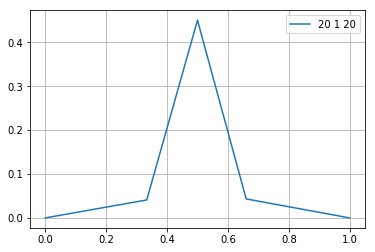

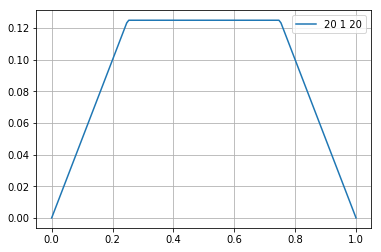

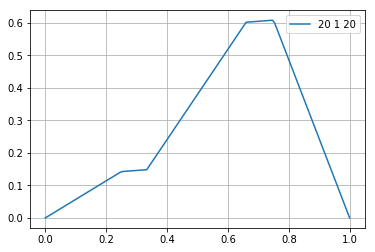

In [106]:
# xs = np.arange(lb, rb+h, h)
sources = [[((lb+rb) / 2, 10)], 
           [((lb+rb)*(0.5 - 0.25),10), ((lb+rb)*(0.5 + 0.25), 10)], 
           [((lb+rb)*(0.5 - 0.25),10), ((lb+rb)*(0.5 + 0.25), 50)]]
cond = [[1, 100, 0, (lb+rb) / 2, rb+1],
        [100, 1, 0, (lb+rb) / 2, rb+1],
        [1, 3, 9, lb+(rb-lb) / 3, lb + (rb-lb) * 2 / 3],
        [9, 3, 1, lb+(rb-lb) / 3, lb + (rb-lb) * 2 / 3],
        [1, 2, 1, lb+(rb-lb) / 3, lb + (rb-lb) * 2 / 3],
        [20, 1, 20, lb+(rb-lb) / 3, lb + (rb-lb) * 2 / 3],
       ]
for K1, K2, K3, X0, X1 in cond:
    k1, k2, k3, x0, x1 = K1, K2, K3, X0, X1
    for s in sources:
        source = s
        plt.plot(*second_task(), label='{} {} {}'.format(k1, k2, k3))
        plt.plot()
        plt.legend()
        plt.grid()
        plt.show()
# plt.plot(*second_task())
# plt.grid()
# plt.show()

## Задание 3


### Вывод используемых формул для задачи 3 и 4



Дано следующее уравнение:

$$
\frac{\partial u}{\partial t} = \frac{\partial^2 u}{\partial x^2}  + f(x), x \in [a, b], t \in [0, T]
$$

Зададим оператор $L$:

$$
L = \frac{\partial}{\partial t} - \frac{\partial^2}{\partial x^2}
$$

Для аппроксимации оператора $L$ с помощью явной схемы используем следующие точки:

![](https://refdb.ru/images/1449/2896254/4b092928.png)

Обозначим для удобства точки следующим образом:

$$
x_{j,k} = (x, t)
$$

Тогда, обозначив разность 
$$x_{j,k}-x_{j-1, k} = h$$
A
$$x_{j,k+1}-x_{j,k}=\tau$$

Получаем:

$$
x_{j-1, k} = (x - h, t)
$$
$$x_{j+1, k} = (x + h, t)
$$
$$
x_{j, k + 1} = (x, t + \tau)
$$
Используя эти точки можем аппроксимировать функции:

$$
\frac{\partial u}{\partial t} = \frac{u(x, t + \tau) - u(x, t)}{\tau}
$$

$$
\frac{\partial^2 u}{\partial x^2} = \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Таким образом результат оператора $Lu$:

$$
Lu = \frac{u(x, t + \tau) - u(x, t)}{\tau} - \frac{u(x+h, t) - 2u(x, t) + y(x-h, t)}{h^2}
$$

Теперь давайте выразим отсюда $u(x, t + \tau)$:

$$
u(x, t + \tau) = u(x, t) + \tau(\frac{u(x + h, t)}{h^2} - 2 \frac{u(x, t)}{h^2} + \frac{u(x-h, t)}{h^2})
$$

### Итого приведя слагаемые:

$$
u(x, t + \tau) = \frac{\tau}{h^2}u(x-h,t) + (1 - \frac{\tau}{h^2})u(x,t) + \frac{\tau}{h^2}u(x+h, t)
$$ 

#### Далее

Зная значения из нижниго слоя, можно найти значения на верхнем слое

#### Примечание для задачи 3

В задаче 3 есть $\frac{\partial}{\partial x}(k(x)\frac{\partial u}{\partial x})$.

В данном случае аппроксимировать будем следующим образом:

$$
\frac{\partial}{\partial x}(k(x)\frac{\partial u}{\partial x}) = \frac{k(x+\frac{h}{2})u'(x+\frac{h}{2}) - k(x-\frac{h}{2})u'(x-\frac{h}{2})}{\frac{h}{2}}
$$

Теперь аппроксимируя $\frac{\partial u}{\partial x}$ и выражая $u(x, t+\tau)$:

$$
u(x,t+\tau)= \frac{k(x-\frac{h}{2})\tau}{h^2}u(x-h, t) + 
(1 - \frac{(k(x-\frac{h}{2})-k(x+\frac{h}{2}))\tau}{h^2}u(x, t) + \frac{k(x+\frac{h}{2})\tau}{h^2}u(x+h, t)
$$

#### Примечание для задачи 4

В задаче 4 перед $\frac{\partial^2 u}{\partial x^2}$ стоит *const*. 

Несложно заметить, что таким образом при выводе эта константа окажется перед аппроксимацией данной производной и получится следующая формула:

$$
u(x, t + \tau) = \frac{c \cdot \tau}{h^2}u(x-h,t) + (1 - \frac{c \cdot \tau}{h^2})u(x,t) + \frac{c \cdot \tau}{h^2}u(x+h, t), c - const
$$ 

In [29]:
# t = 0.005
# h = 0.02
# phi = lambda x: -20*(x**2)+74*x-63
phi = lambda x: -20*(x-0.5)**2+25*(x-0.5)
# a = 20 b = -6-4*a c = 12 + 3.75*a
# phi = lambda x: 3
# k = lambda x: x ** (-1/3)
k = lambda x: x
f = lambda x: x**0.5 + 4
a, g1 = 0.5, lambda t: 0
b, g2 = 1.5, lambda t: 5
h = 0.08
t = 0.001
T = 500*t
num_t = int(T / t) + 1
num_k = int((b - a) / h) + 1

In [30]:
def third_task():
    matrix = np.zeros(shape=(num_t, num_k))

    t = T/num_t
    matrix [:, 0] = np.array([g1(t) for t in np.linspace(0, T, num_t)])
    matrix[:,-1] = np.array([g2(t) for t in np.linspace(0, T, num_t)])

    matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    for i in range(1, num_t):
        for j in range(1, num_k - 1):
            xj = a + j*h
            matrix[i][j] = k(xj-h/2)*t/(h ** 2) * matrix[i-1][j-1] + \
                           (1 -(k(xj-h/2)+k(xj+h/2))*t/(h ** 2)) * matrix[i-1][j] + \
                           k(xj+h/2)*t/(h ** 2) * matrix[i-1][j+1] + \
                           t * f(xj)*(1-math.exp(-i*t))
                        
    return matrix

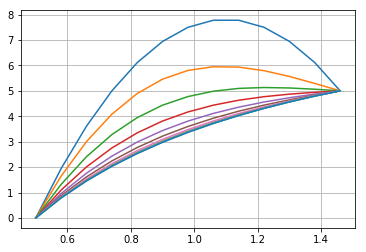

In [31]:
xs = np.array([a + i*h for i in range(num_k)])

matrix = third_task()
for i in range(0, num_t, 50):
    plt.plot(xs, matrix[i], label=i)
#     print(matrix[i][-1])
# plt.plot(xs, matrix[0], label=0)
# print(phi(1.5), phi(2.5))
# plt.plot(xs, matrix[1], label=1)
# plt.plot(xs, matrix[2], label=2)
plt.grid()
plt.show()

## Задание 4

In [9]:
a = 0
b = 1
k = 1
T = 0.05
phi = lambda x: 1
g1 = lambda t: math.exp(t)
g2 = lambda t: math.exp(10*t)
f = lambda x, t: 0
h = (b-a) / 50
t = 0.5*((h**2) / k)
num_t = int(T / t) + 1
num_k = int((b - a) / h) + 1

In [12]:
def fourth_task():
    matrix = np.zeros(shape=(num_t, num_k))


    matrix [:, 0] = np.array([g1(ti) for ti in np.linspace(0, T, num_t)])
    matrix[:,-1] = np.array([g2(ti) for ti in np.linspace(0, T, num_t)])

    matrix[0,:] = np.array([phi(xi) for xi in np.linspace(a, b, num_k)])

    coef = np.array([k * t / h**2, 1 - 2 * k * t / h**2, k * t / h**2]) # transpose

    for i in range(1, num_t):
        for j in range(1, num_k - 1):
            matrix[i][j] = matrix[i - 1, j-1:j+2].dot(coef) + t * f(a+j*h, i*t)
    return matrix

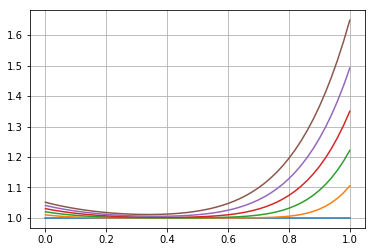

In [13]:
xs = np.array([a + i*h for i in range(num_k)])

matrix = fourth_task()
for i in range(0, num_t, 50):
    plt.plot(xs, matrix[i], label=i)
plt.grid()
plt.show()